In [90]:
## EDA for the Data File we collected through spotify API (+ spotipy library)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

df = pd.read_csv('datafile.csv', header=0)
df.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
count,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4.299000e+03,4299.000000,4299.000000
mean,0.615250,0.594460,5.207490,-8.886428,0.645034,0.081814,0.307632,0.150868,0.175082,0.480163,119.179093,2.049478e+05,3.924401,71.625960
std,0.172555,0.258757,3.648177,6.570039,0.478559,0.085887,0.337064,0.316484,0.140381,0.254952,28.060024,6.080650e+04,0.366853,12.463409
min,0.061100,0.000283,0.000000,-41.665000,0.000000,0.022700,0.000009,0.000000,0.010400,0.023800,31.270000,6.876000e+04,1.000000,0.000000
25%,0.515000,0.433000,2.000000,-10.178000,0.000000,0.035700,0.030050,0.000000,0.092800,0.269000,97.997500,1.666605e+05,4.000000,64.000000
50%,0.633000,0.652000,5.000000,-6.829000,1.000000,0.047100,0.150000,0.000017,0.116000,0.473000,120.027000,1.963140e+05,4.000000,74.000000
75%,0.739000,0.801000,8.000000,-5.025000,1.000000,0.083000,0.566000,0.011400,0.210000,0.686000,134.948500,2.346600e+05,4.000000,80.000000
max,0.967000,0.996000,11.000000,-0.514000,1.000000,0.906000,0.996000,0.995000,0.970000,0.980000,219.483000,1.622576e+06,5.000000,100.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4299 non-null   float64
 1   energy            4299 non-null   float64
 2   key               4299 non-null   int64  
 3   loudness          4299 non-null   float64
 4   mode              4299 non-null   int64  
 5   speechiness       4299 non-null   float64
 6   acousticness      4299 non-null   float64
 7   instrumentalness  4299 non-null   float64
 8   liveness          4299 non-null   float64
 9   valence           4299 non-null   float64
 10  tempo             4299 non-null   float64
 11  type              4299 non-null   object 
 12  id                4299 non-null   object 
 13  uri               4299 non-null   object 
 14  track_href        4299 non-null   object 
 15  analysis_url      4299 non-null   object 
 16  duration_ms       4299 non-null   int64  


In [92]:
#useful columns for our analysis
list1 = list(df.select_dtypes(include=['float']).columns)
list2 = list(df.select_dtypes(include=['int']).columns)
list3 = ['release_date','track_title','track_artist','playlist_id','playlist_name','id']

print(list1)
print(list2)
print(list3)


['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
['key', 'mode', 'duration_ms', 'time_signature', 'popularity']
['release_date', 'track_title', 'track_artist', 'playlist_id', 'playlist_name', 'id']


In [93]:
useful_param = list1+list2+list3
print(useful_param)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'key', 'mode', 'duration_ms', 'time_signature', 'popularity', 'release_date', 'track_title', 'track_artist', 'playlist_id', 'playlist_name', 'id']


In [94]:
df_final = df[useful_param]
df_final.shape


(4299, 20)

In [95]:
# of the 20 columns, id, playlist_name, track_title, track_artist, playlist_id are used just for reference
# and not as data to include in the analysis.
# so te first 14 columns + release date are interesting for us.
# note anyway that release date is a 'spurious' data as sometimes it reports the exact release date,
# sometimes just the year

In [96]:
# let's see if there are duplicates (i.e. tracks appearing in more than 1 playlist)

df_duplicates['the_counter'] = 1
df_duplicates = df_final.groupby(['track_title', 'track_artist', 'popularity'])['id'].value_counts().to_frame('count')
df_dup_sorted = df_duplicates.sort_values('count', ascending=False)
df_dup_sorted.head(20)


,,,,count
track_title,track_artist,popularity,id,
I'm Good (Blue),David Guetta,97,4uUG5RXrOk84mYEfFvj3cK,13
Rich Flex,Drake,96,1bDbXMyjaUIooNwFE9wn0N,8
Made You Look,Meghan Trainor,94,0QHEIqNKsMoOY5urbzN48u,8
I Ain't Worried,OneRepublic,95,4h9wh7iOZ0GGn8QVp4RAOB,7
Cold Heart - PNAU Remix,Elton John,87,6zSpb8dQRaw0M1dK8PBwQz,7
10:35,Tiësto,86,6BePGk3eCan4FqaW2X8Qy3,7
Do It To It,ACRAZE,83,20on25jryn53hWghthWWW3,6
Where Are You Now,Lost Frequencies,88,3uUuGVFu1V7jTQL60S1r8z,6
Unholy (feat. Kim Petras),Sam Smith,100,3nqQXoyQOWXiESFLlDF1hG,6


In [97]:
# note the strict correlation between popularity of a track and its presence in more than 1 playlist.
# the higher the count, the higher popularity. This doesn't always apply the other way around (no biunivocity). 
# also, we see some tracks with high popularity with presence in just 1 plalist, while tracks with lower pop
# ad presence in 6 playlists.
# out of 4299 tracks, only 3312 are distinct tracks.
# 987 tracks (approx 23%) are present in more than one of the 50 most followed playlists on spotify.
# we are not dropping them, as each of them contributes to define the "style" of a playlist.

# Also, we are ignoring the position within the playlist, which is very important in term of "weight" of a track
# in the playlist.
# A track which is positioned at the end of a playlist will be reached (normally) less frequently
# than a track positioned at the beginning of a playlist.
# Considering a completely passive usage of the platform (with people not interacting or skipping the tracks)
# our 'same weight' assumption could be acceptable. But people do skip or abandon the listening of a playlist.
# The nature of each playlist is more weighted with the first tracks (in playlist order) streaming from it.


In [98]:



#describe by each playlist

df_final.groupby('playlist_name')['danceability'].describe()

,count,mean,std,min,25%,50%,75%,max
playlist_name,,,,,,,,
90s Rock Anthems,100.0,0.477140,0.128247,0.1430,0.391750,0.4765,0.55375,0.804
Acoustic Covers,100.0,0.528850,0.134220,0.2660,0.429500,0.5475,0.61325,0.844
Acoustic Hits: Oldies but Goodies,50.0,0.580740,0.128691,0.2700,0.490000,0.5820,0.64450,0.946
All Out 2000s,100.0,0.669770,0.172784,0.2090,0.554000,0.6965,0.79600,0.967
All Out 70s,100.0,0.603930,0.141758,0.2920,0.509250,0.5930,0.71950,0.935
All Out 80s,100.0,0.619410,0.140280,0.2520,0.528500,0.6210,0.72400,0.920
All Out 90s,100.0,0.573950,0.164798,0.2560,0.437750,0.5620,0.69275,0.956
Baila Reggaeton,50.0,0.800620,0.078846,0.5310,0.761500,0.8135,0.85050,0.951
Beast Mode,100.0,0.730450,0.103995,0.4860,0.657500,0.7420,0.80950,0.963


In [99]:
df_final.groupby('playlist_name')['energy'].describe()



,count,mean,std,min,25%,50%,75%,max
playlist_name,,,,,,,,
90s Rock Anthems,100.0,0.783720,0.157753,0.345000,0.714000,0.820500,0.912000,0.9660
Acoustic Covers,100.0,0.250725,0.141375,0.051100,0.147500,0.228500,0.298250,0.8380
Acoustic Hits: Oldies but Goodies,50.0,0.550180,0.177207,0.253000,0.419500,0.545500,0.714000,0.9020
All Out 2000s,100.0,0.742490,0.148756,0.291000,0.661000,0.765000,0.850750,0.9880
All Out 70s,100.0,0.601670,0.196265,0.161000,0.444750,0.586000,0.758000,0.9470
All Out 80s,100.0,0.696790,0.197103,0.239000,0.534500,0.726500,0.861000,0.9870
All Out 90s,100.0,0.702000,0.188981,0.214000,0.588250,0.718500,0.866250,0.9540
Baila Reggaeton,50.0,0.718280,0.112346,0.475000,0.651750,0.718500,0.800250,0.9580
Beast Mode,100.0,0.710660,0.136838,0.373000,0.608000,0.715500,0.821750,0.9670


In [100]:
df_final['mode'].value_counts()


1    2773
0    1526
Name: mode, dtype: int64

In [101]:
df_final.groupby('playlist_name')['mode'].describe()


,count,mean,std,min,25%,50%,75%,max
playlist_name,,,,,,,,
90s Rock Anthems,100.0,0.760000,0.429235,0.0,1.0,1.0,1.0,1.0
Acoustic Covers,100.0,0.820000,0.386123,0.0,1.0,1.0,1.0,1.0
Acoustic Hits: Oldies but Goodies,50.0,0.860000,0.350510,0.0,1.0,1.0,1.0,1.0
All Out 2000s,100.0,0.580000,0.496045,0.0,0.0,1.0,1.0,1.0
All Out 70s,100.0,0.740000,0.440844,0.0,0.0,1.0,1.0,1.0
All Out 80s,100.0,0.700000,0.460566,0.0,0.0,1.0,1.0,1.0
All Out 90s,100.0,0.690000,0.464823,0.0,0.0,1.0,1.0,1.0
Baila Reggaeton,50.0,0.420000,0.498569,0.0,0.0,0.0,1.0,1.0
Beast Mode,100.0,0.500000,0.502519,0.0,0.0,0.5,1.0,1.0


In [102]:
# mode is for "major"[1] or "minor"[0] key of the song.
# in some contests, it can be described as the "happiness" of the song.

# looking at the mean value of the mode, we can discriminate and see which of the playlist are the most "happy"
# in musical terms.
# this as always does not include the lyrics side (sentiment) which could give another prespective.

# Hot country
# Sleep
# Christmas Hits 
# are the playlist with the highest Mode Mean. Makes sense.


In [103]:
df_final['key'].value_counts()

1     511
0     504
7     431
2     429
11    381
9     372
5     354
10    307
4     302
6     290
8     284
3     134
Name: key, dtype: int64

In [104]:
#keys are 12, the semitones of the chromatic scale.
#0 is C
#1 is C#
#...
#11 is B



In [105]:
df1 = df_final.groupby('playlist_name')['popularity'].describe()
df1.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
playlist_name,,,,,,,,
Today's Top Hits,50.0,89.980000,4.391504,79.0,87.00,90.0,93.00,100.0
Top 50 - Global,50.0,88.540000,7.900426,67.0,83.00,91.5,94.00,100.0
Songs to Sing in the Car,100.0,85.500000,3.557607,82.0,83.00,85.0,87.00,100.0
Pop Up,100.0,84.940000,6.349771,67.0,80.00,85.0,89.00,100.0
Viva Latino,50.0,83.260000,7.150881,64.0,78.00,83.5,88.00,97.0
Beast Mode,100.0,81.730000,5.018863,75.0,78.00,81.0,83.25,97.0
Top Gaming Tracks,100.0,81.700000,4.839860,69.0,78.00,81.0,85.00,97.0
Hot Hits Philippines,50.0,81.380000,9.347902,67.0,73.25,80.5,89.75,100.0
Songs to Sing in the Shower,100.0,81.350000,2.430343,78.0,79.00,81.0,83.00,88.0


In [106]:
# so the playlist with the (mean) most popular tracks are
# Today's Top Hits
# Top 50 - Global
# Songs to Sing in the Car

# not surprisingly, the playlist with the least popular tracks are the Lo-Fi playlist
# this is due to the fact that these kind of playlist are needed for "concentration", so you
# don't get distracted by popular songs.
# see also Deep Focus and Peaceful Piano.
# Interestingly, the New Music Friday contains quite "unpopular" tracks.
# This is because it's the launch pad for new tracks, that COULD become popular in the future.
# This Playlist contains tracks freshly released.


In [107]:
df_final.groupby('playlist_name')['release_date'].describe()

,count,unique,top,freq
playlist_name,,,,
90s Rock Anthems,100,76,1995,5
Acoustic Covers,100,84,2021-11-12,5
Acoustic Hits: Oldies but Goodies,50,42,2000-07-10,3
All Out 2000s,100,73,2006-01-01,7
All Out 70s,100,69,1977,6
All Out 80s,100,77,1980,5
All Out 90s,100,79,1999-06-08,4
Baila Reggaeton,50,39,2022-05-06,3
Beast Mode,100,81,2022-05-06,5


In [108]:
# see how NewMusic Friday contains 63 tracks released just a few days ago (at the time of data collection)
# Into the Top50 global, just 6 are "new and recent". And I suspect this is due to heavy marketing from outside the platform.


In [109]:
df_final.groupby('playlist_name')['release_date'].value_counts()


playlist_name     release_date
90s Rock Anthems  1995            5
                  1991-08-27      3
                  1994-01-01      3
                  1991-09-17      2
                  1991-09-24      2
                                 ..
mint              2022-10-17      1
                  2022-11-09      1
                  2022-11-14      1
                  2022-11-15      1
                  2022-11-25      1
Name: release_date, Length: 3102, dtype: int64

In [110]:
df_final.groupby('playlist_name')['tempo'].describe()

,count,mean,std,min,25%,50%,75%,max
playlist_name,,,,,,,,
90s Rock Anthems,100.0,120.769040,31.901855,74.807,92.93950,110.2510,146.46925,203.006
Acoustic Covers,100.0,116.594880,31.688930,68.991,90.70750,116.0425,134.61675,193.841
Acoustic Hits: Oldies but Goodies,50.0,114.723920,29.389205,74.897,92.41875,109.0240,133.29075,205.846
All Out 2000s,100.0,119.551030,26.580902,77.019,98.51725,117.7010,131.23050,180.114
All Out 70s,100.0,120.563770,24.044161,74.126,104.35250,119.6235,136.32500,196.605
All Out 80s,100.0,121.160730,25.367426,74.375,105.35500,117.9275,133.74725,189.507
All Out 90s,100.0,117.032340,29.106959,67.531,94.52900,112.0755,133.95525,203.006
Baila Reggaeton,50.0,109.168960,30.544574,81.011,92.87800,95.9965,104.19100,196.120
Beast Mode,100.0,124.987490,22.116392,61.311,116.99500,124.9595,139.89900,178.781


In [111]:
# note how the LoFi playlists have the slowest mean tempo.
# but these playlist have also the highest variance and a wide gap between the slowest and the fastest tracks.
# Upon a control, looks like the data generated by the algorithm could be wrong.
# Bakar "Hell'n'back" [reported tempo 210 is actually been doubled. Real tempo is 105]
# Benson boone "Before You" [reported 202 is actually 69, but the track contains triplet (ternary tempo) and the algo got it wrong]
# All in all, we should analyze the max (and min) of the playlists, in order to cut out the outliers

# Cardio (a playlist for gym) has a tightly strict tempo requirement. With a std dev of just 4
# all these stats numbers (except count) are BPM. beats per minute.



In [112]:
df_final.groupby('playlist_name')['time_signature'].describe()


,count,mean,std,min,25%,50%,75%,max
playlist_name,,,,,,,,
90s Rock Anthems,100.0,3.960000,0.196946,3.0,4.0,4.0,4.0,4.0
Acoustic Covers,100.0,3.890000,0.490207,1.0,4.0,4.0,4.0,5.0
Acoustic Hits: Oldies but Goodies,50.0,3.960000,0.282843,3.0,4.0,4.0,4.0,5.0
All Out 2000s,100.0,3.990000,0.173787,3.0,4.0,4.0,4.0,5.0
All Out 70s,100.0,3.970000,0.171447,3.0,4.0,4.0,4.0,4.0
All Out 80s,100.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
All Out 90s,100.0,3.930000,0.355477,1.0,4.0,4.0,4.0,4.0
Baila Reggaeton,50.0,3.980000,0.141421,3.0,4.0,4.0,4.0,4.0
Beast Mode,100.0,3.950000,0.358870,1.0,4.0,4.0,4.0,5.0


<AxesSubplot:xlabel='time_signature', ylabel='Count'>

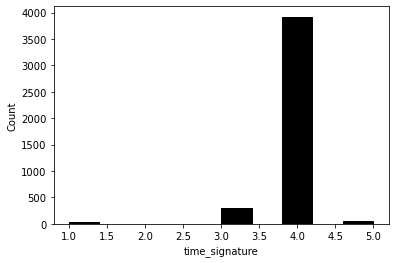

In [113]:
# I was expecting a min of 3 and a max of 5 (or 7) 
# What really strucks here is the "1", given to some of the tracks.
# All in all, these are just 26 out of the 4k+ tracks. Again, the algo has been cheated.
# these tracks are all in the "low tempo" and are so diluted that the algo can not recognize the accents 
# in order to determine the tempo, if it's a ternary or 4/4 (or a 5/4, in exceptional cases)

# here's a plot of the distribution

plt.figure(figsize=(6, 4))

sns.histplot(df_final.time_signature, bins=10, color='black', alpha=1)

In [114]:
df_filtered1 = df_final[(df_final.time_signature)==1]
df_filtered1.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,time_signature,popularity,release_date,track_title,track_artist,playlist_id,playlist_name,id
724,0.773,0.4220,-4.572,0.1870,0.00783,0.006930,0.129,0.4880,77.502,1,0,136267,1,78,2022-01-13,pushin P (feat. Young Thug),Gunna,37i9dQZF1DX76Wlfdnj7AP,Beast Mode,3XOalgusokruzA5ZBA2Qcb
830,0.428,0.2760,-11.729,0.0312,0.73200,0.000005,0.117,0.0382,99.195,4,1,280000,1,74,1997-11-14,"My Heart Will Go On - Love Theme from ""Titanic""",Céline Dion,37i9dQZF1DXbTxeAdrVG2l,All Out 90s,33LC84JgLvK2KuW43MfaNq
893,0.316,0.6300,-5.963,0.1170,0.47100,0.262000,0.205,0.3130,89.643,5,1,153294,1,79,2019-10-04,Still Don't Know My Name,Labrinth,37i9dQZF1DX4WYpdgoIcn6,Chill Hits,6N22FZs2ZhPBYi3b9XPajV
900,0.648,0.3080,-11.729,0.0400,0.88600,0.077400,0.124,0.1980,76.997,1,1,184638,1,78,2020-06-23,IDK You Yet,Alexander 23,37i9dQZF1DX4WYpdgoIcn6,Chill Hits,0j1Ia2lQWrcXrQZI4AdJlk
1291,0.405,0.0187,-29.086,0.0372,0.98600,0.924000,0.107,0.2290,75.780,10,1,120269,1,64,2022-11-11,Nouvelles Tentatives,Zander Shaelyn,37i9dQZF1DX4sWSpwq3LiO,Peaceful Piano,6rvmhiAd5jtT5CzLIcnj4p


In [115]:
df_filtered1.groupby('playlist_name')['tempo'].describe()

,count,mean,std,min,25%,50%,75%,max
playlist_name,,,,,,,,
Acoustic Covers,1.0,74.464000,NaN,74.464,74.46400,74.4640,74.46400,74.464
All Out 90s,1.0,99.195000,NaN,99.195,99.19500,99.1950,99.19500,99.195
Beast Mode,1.0,77.502000,NaN,77.502,77.50200,77.5020,77.50200,77.502
Brain Food,2.0,148.996500,36.768846,122.997,135.99675,148.9965,161.99625,174.996
Chill Hits,2.0,83.320000,8.942072,76.997,80.15850,83.3200,86.48150,89.643
Christmas Hits,1.0,75.248000,NaN,75.248,75.24800,75.2480,75.24800,75.248
Deep Focus,1.0,129.445000,NaN,129.445,129.44500,129.4450,129.44500,129.445
Peaceful Piano,4.0,111.719750,24.797716,75.780,104.94600,121.2825,128.05625,128.534
Power Workout,2.0,98.801000,30.121335,77.502,88.15150,98.8010,109.45050,120.100


In [116]:
# (tempo signature = 1, which musically doesn't make sense) the most affected playlists are the "calm ones"
# we are going to exclude these tracks from the training dataset we'll be using, as the total count is quite minimal.
# and having time signature of 1 could be an error.

# there should be a check even on the final stage (when we will assign a track to the best fitting playlist, based on the trained model)


<AxesSubplot:>

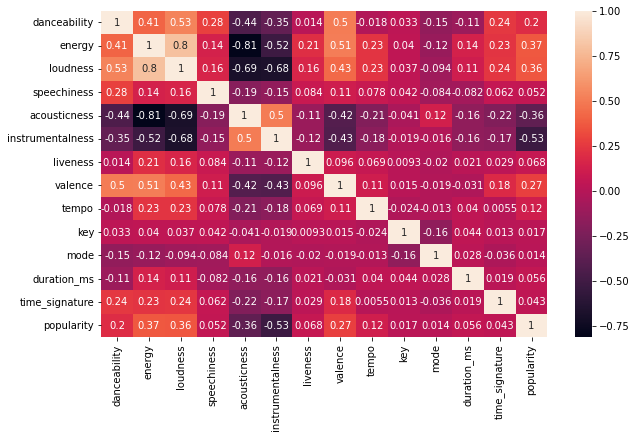

In [117]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_final.corr(), ax=ax, annot=True)

In [118]:
# playlist are composed of 50 to 100 tracks each
# most of them contain tracks that are popular.
# only the Lo-Fi playlist includes a track with 0 popularity

# the corr matrix among the numerical values finds that the most 'correlated' values among all the tacks dataset
# are the following  (corr > 0.5):
# energy / loudness
# danceability / loudness
# valence / energy
# valence / danceability

# the most negatively correlated (corr < -0.5):
# acousticness / energy
# acousticness / loudness
# instrumentalness / loudness
# instrumentalness / energy

# valence (which is a term we can no define seem correlated with danceability of a song and its energy)
# popularity semms correlated with energy / loudness (and valence)
# this comes even in term of the music production:
# a track that is going to be popular will have the most out of the mix & mastering process, 
# putting into it the most "loudness". "energy" is again related t danceability. 
# The most popular tracks seems to be the most danceable.

# duration, mode and key seems to be uncorrelated (min -0.16 to 0.16 max) with all the other aspects.
# while tempo and time signatures are correlated.


In [119]:
# let's remove the rows withtimesignature = 1
# and let's analyze the correlation again

df_filtered2 = df_final[(df_final.time_signature)>1]

df_filtered2.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,time_signature,popularity
count,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4.271000e+03,4271.000000,4271.000000
mean,0.616592,0.596990,-8.814688,0.081906,0.304600,0.147850,0.175377,0.482016,119.304114,5.211426,0.644580,2.051304e+05,3.943573,71.680403
std,0.171489,0.257139,6.473208,0.086027,0.335135,0.313641,0.140734,0.254416,28.021704,3.648877,0.478697,6.072841e+04,0.281099,12.451280
min,0.061100,0.000283,-41.665000,0.022700,0.000009,0.000000,0.010400,0.023800,31.270000,0.000000,0.000000,6.876000e+04,3.000000,0.000000
25%,0.516000,0.437000,-10.068000,0.035700,0.029800,0.000000,0.092700,0.272000,98.029500,2.000000,0.000000,1.670670e+05,4.000000,64.000000
50%,0.634000,0.655000,-6.781000,0.047200,0.149000,0.000016,0.117000,0.478000,120.032000,5.000000,1.000000,1.965200e+05,4.000000,74.000000
75%,0.739500,0.802000,-5.022500,0.083000,0.555500,0.010300,0.211500,0.688000,135.001500,8.000000,1.000000,2.350000e+05,4.000000,80.000000
max,0.967000,0.996000,-0.514000,0.906000,0.996000,0.995000,0.970000,0.980000,219.483000,11.000000,1.000000,1.622576e+06,5.000000,100.000000


In [120]:
# we removed 28 tracks.
# time_signature has a lower variance now.

# this could be counter-intuitive (inserting a  bias from the data)
# but a tempo of "1" does not make sense. 
# instead of remapping to a timesignature which is the mean, as the amount of data is small, we're removing it.


<AxesSubplot:>

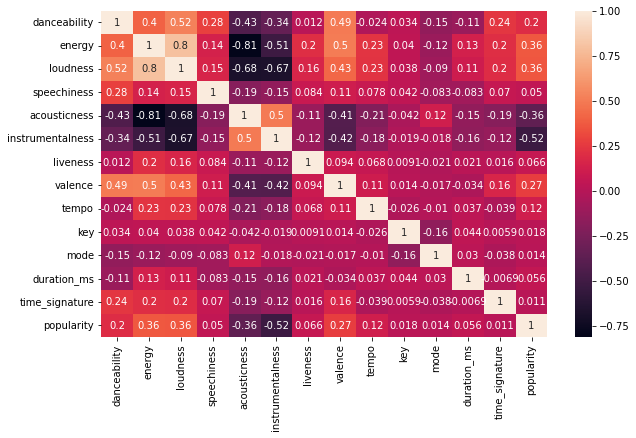

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_filtered2.corr(), ax=ax, annot=True)

In [122]:

df_filtered2.to_csv("preprocessed_df.csv", index=False)

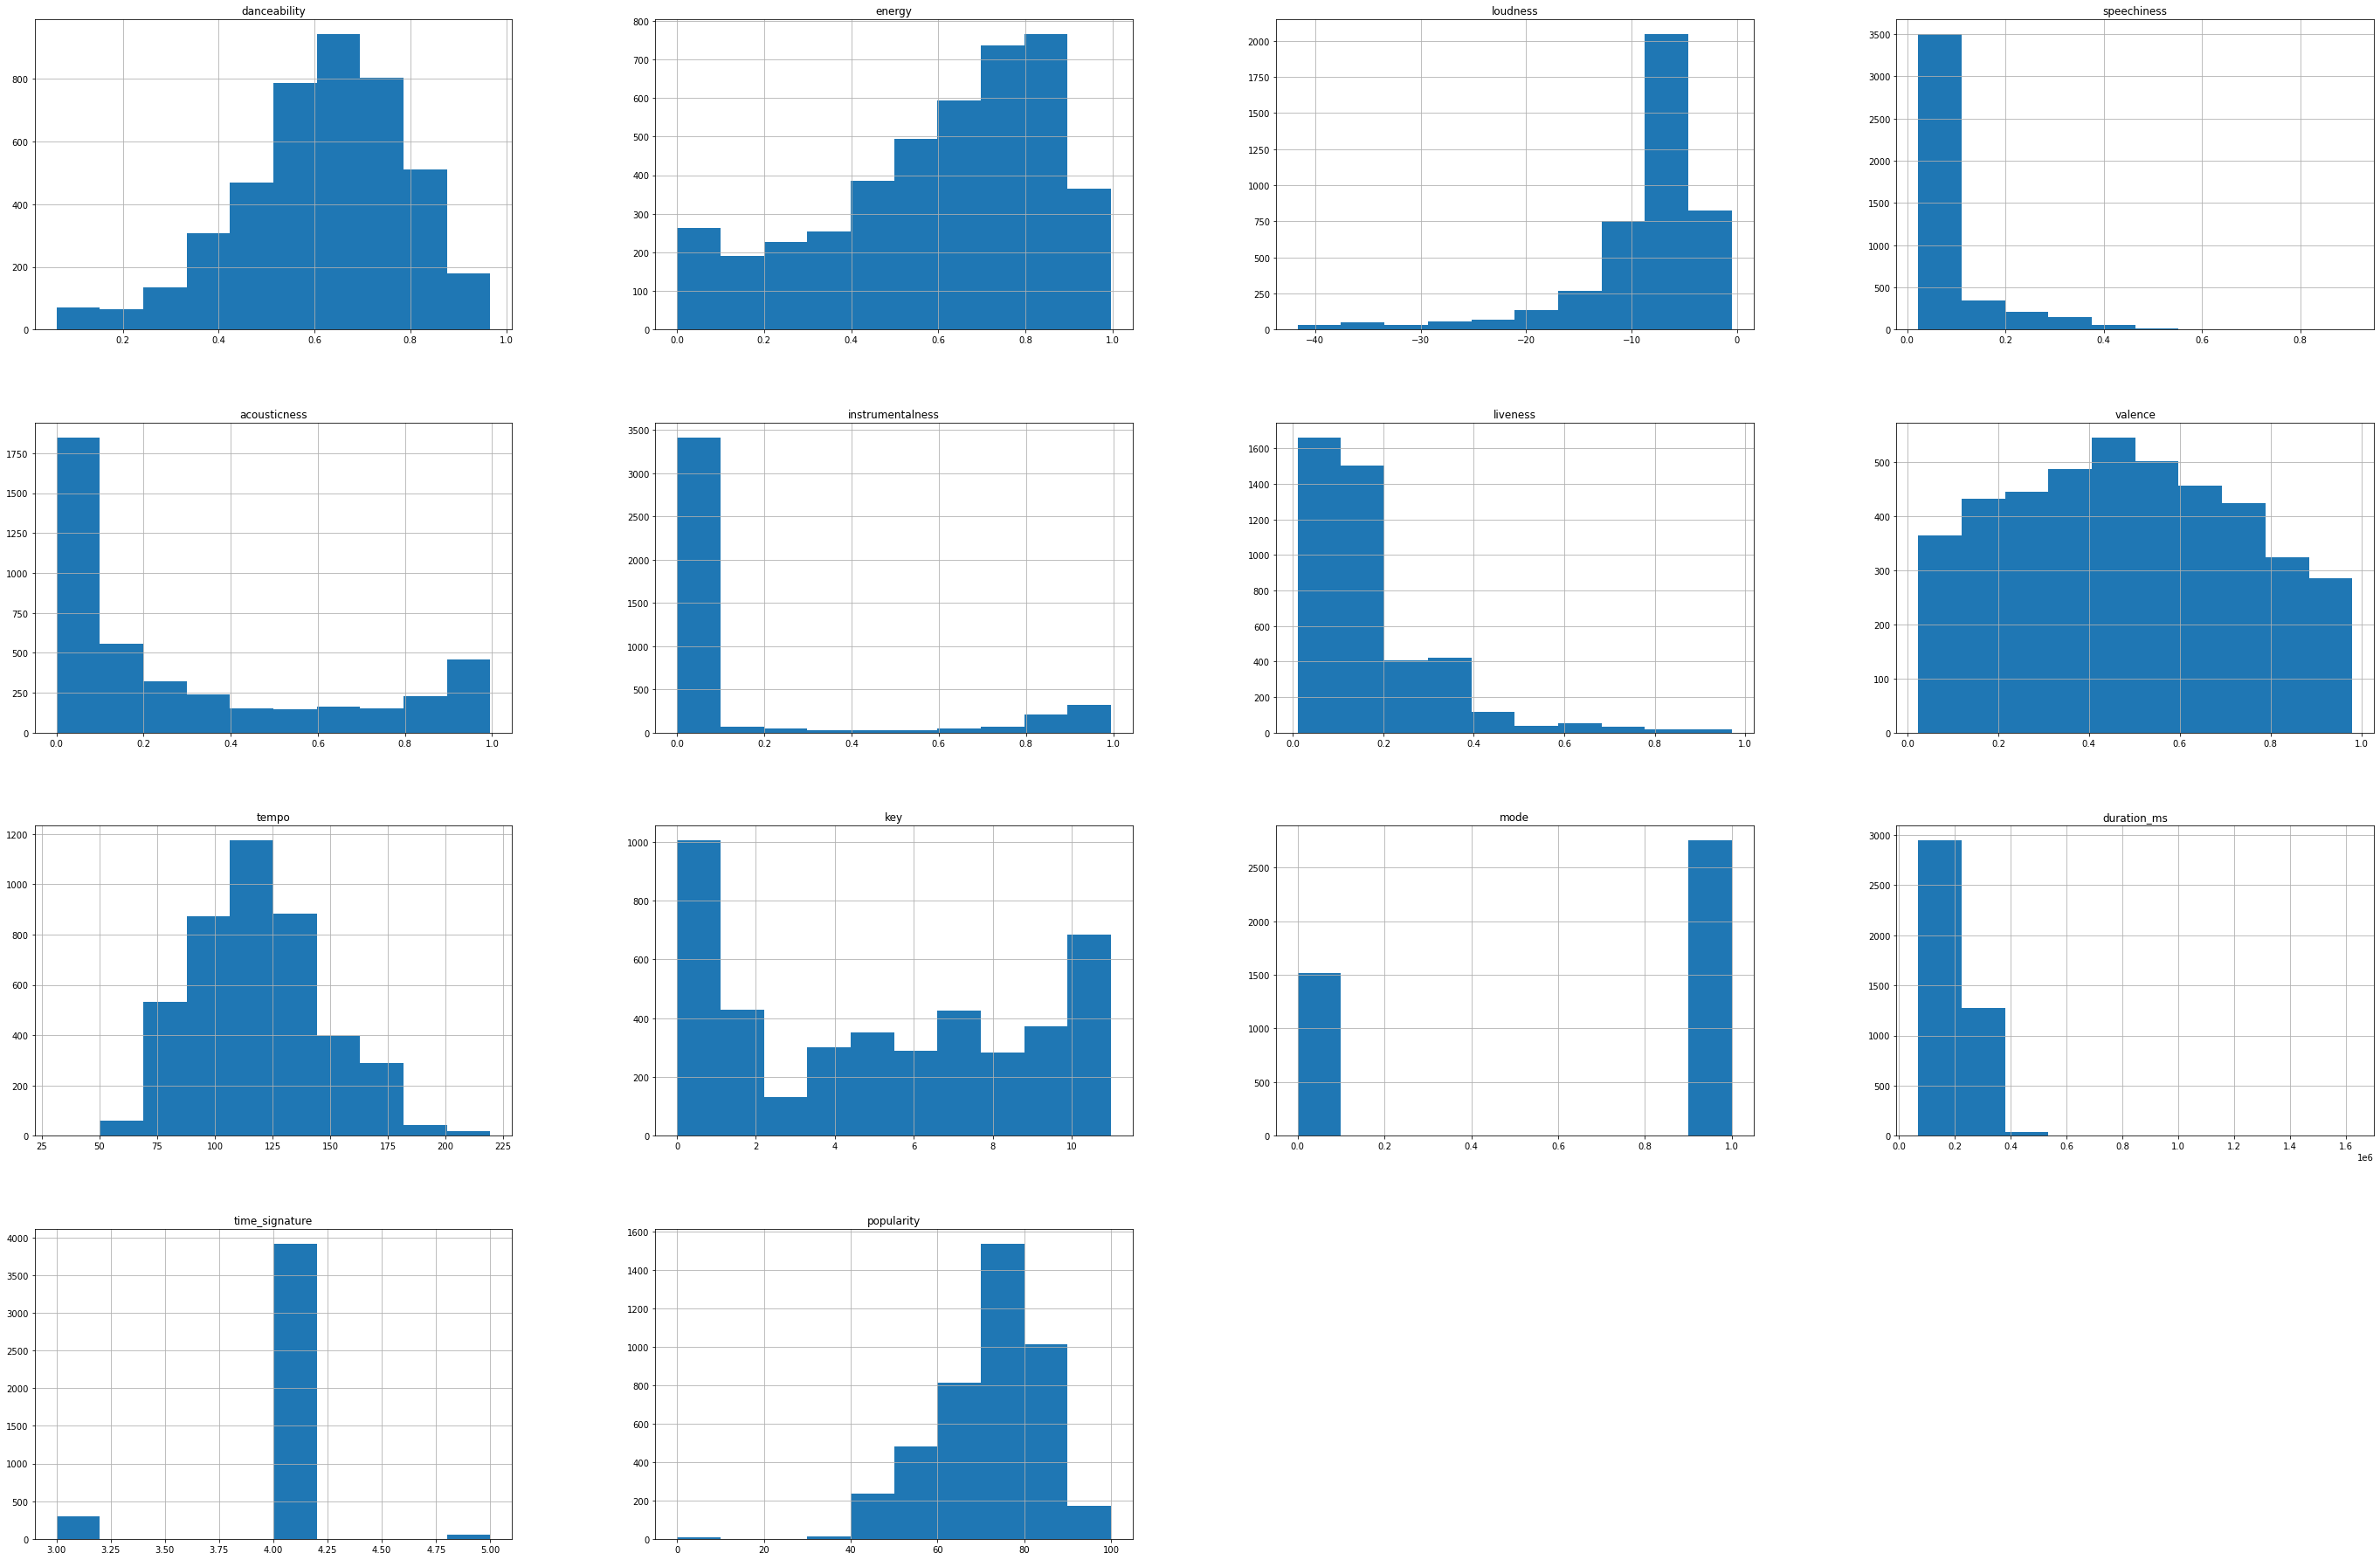

In [126]:
df_filtered2.hist(figsize = (48,32));